Financial highlights for Nintendo were obtained using this link: https://www.nintendo.co.jp/ir/en/finance/highlight/index.html and data from youtube were obtained from Youtube's API.

# PewDiePie

In [266]:
from youtube_videos import youtube_search
import json
from apiclient.discovery import build

In [267]:
youtube = build('youtube','v3', developerKey=api_key)

In [268]:
req = youtube.channels().list(forUsername='PewDiePie',part='snippet, statistics, topicDetails')
res = req.execute()

In [269]:
res['items']

[{'kind': 'youtube#channel',
  'etag': '"XpPGQXPnxQJhLgs6enD_n8JR4Qk/ZXdYi_hHlY7fgj8CLkCt51HJJhE"',
  'id': 'UC-lHJZR3Gqxm24_Vd_AJ5Yw',
  'snippet': {'title': 'PewDiePie',
   'description': 'I make videos.',
   'customUrl': 'PewDiePie',
   'publishedAt': '2010-04-29T10:54:00.000Z',
   'thumbnails': {'default': {'url': 'https://yt3.ggpht.com/a-/AAuE7mAPBVgUYqlLw9SvJyKAVWmgkQ2-KrkgSv4_5A=s88-mo-c-c0xffffffff-rj-k-no',
     'width': 88,
     'height': 88},
    'medium': {'url': 'https://yt3.ggpht.com/a-/AAuE7mAPBVgUYqlLw9SvJyKAVWmgkQ2-KrkgSv4_5A=s240-mo-c-c0xffffffff-rj-k-no',
     'width': 240,
     'height': 240},
    'high': {'url': 'https://yt3.ggpht.com/a-/AAuE7mAPBVgUYqlLw9SvJyKAVWmgkQ2-KrkgSv4_5A=s800-mo-c-c0xffffffff-rj-k-no',
     'width': 800,
     'height': 800}},
   'localized': {'title': 'PewDiePie', 'description': 'I make videos.'},
   'country': 'US'},
  'statistics': {'viewCount': '20088058539',
   'commentCount': '0',
   'subscriberCount': '81197613',
   'hiddenSubscriber

In [270]:
for item in res['items']:
    print(item['statistics'])

{'viewCount': '20088058539', 'commentCount': '0', 'subscriberCount': '81197613', 'hiddenSubscriberCount': False, 'videoCount': '3721'}


# Nintendo

In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [272]:
nintendo_is_df = pd.read_csv("consolidated_pl.csv")
nintendo_df = nintendo_is_df.drop(['Consolidated Statements of Income Transition', '(In millions of yen)', 
                                   'Unnamed: 3', '(Note)', 'Unnamed: 18'], axis=1)
nintendo_df = nintendo_df.dropna(how='all')

In [273]:
col_of_interest = ['Net sales', 'Gross profit', 'Operating profit', 'Year']

In [274]:
def clean_df(df, col):
    
    for i in range(3):
        sales = col[i]
        df[sales] = df[sales].str.replace(",","").astype(float)
    return df 

In [275]:
nintendo_df = clean_df(nintendo_df, col_of_interest)
nintendo_df.head()

,"Nintendo Co., Ltd.",Year,Net sales,Gross profit,(Gross profit ratio),Operating profit,(Operating profit ratio),Ordinary profit,(Ordinary profit ratio),Profit before income taxes,Profit attributable to owners of parent,(Profit attributable to owners of parent ratio),Foreign exchange gains,Foreign exchange losses,
0,NaN,FY8/1981,23948.0,8026.0,(33.5%),4310.0,(18.0%),"4,124",(17.2%),"4,125","1,640",(6.8%),-,-,NaN
1,NaN,FY8/1982,66141.0,31487.0,(47.6%),22702.0,(34.3%),"23,609",(35.7%),"23,662","10,711",(16.2%),-,286,NaN
2,NaN,FY8/1983,67715.0,30653.0,(45.3%),20592.0,(30.4%),"23,091",(34.1%),"23,120","10,462",(15.4%),-,68,NaN
3,NaN,FY8/1984,68140.0,26400.0,(38.7%),16641.0,(24.4%),"18,332",(26.9%),"18,332","9,433",(13.8%),-,95,NaN
4,NaN,FY8/1985,81428.0,31875.0,(39.2%),20701.0,(25.4%),"22,323",(27.4%),"22,429","9,823",(12.1%),90,-,NaN


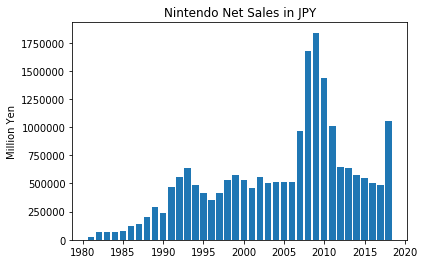

In [277]:
year = list(range(1981, 2019))
plt.title('Nintendo Net Sales in JPY')
total_ta_plt = plt.bar(year, nintendo_df['Net sales'], align='center', alpha=1)
plt.ylabel('Million Yen')
plt.show()